In [1]:
!pip install qutip matplotlib numpy

# Imports
import numpy as np
import matplotlib.pyplot as plt
from qutip import destroy, basis, sesolve, expect, tensor, qeye, squeeze, expm, ptrace, wigner

ImportError: cannot import name 'expm' from 'qutip' (C:\Users\soumy\.conda\envs\qc-env\lib\site-packages\qutip\__init__.py)

In [ ]:
##Project 1: Squeezed-Vacuum Dynamics

In [8]:
# Parameters
N = 20                # Fock basis size
r = 0.8               # squeezing strength
t_list = np.linspace(0, 2, 200)

# Operators
a = destroy(N)
H_single = 1j * r * (a.dag()**2 - a**2)
psi0 = basis(N, 0)

# Solve dynamics
res1 = sesolve(H_single, psi0, t_list, [])

# Quadratures
X = (a + a.dag())/np.sqrt(2)
P = (a - a.dag())/(1j*np.sqrt(2))
varX = [expect(X**2, st) - expect(X, st)**2 for st in res1.states]
varP = [expect(P**2, st) - expect(P, st)**2 for st in res1.states]

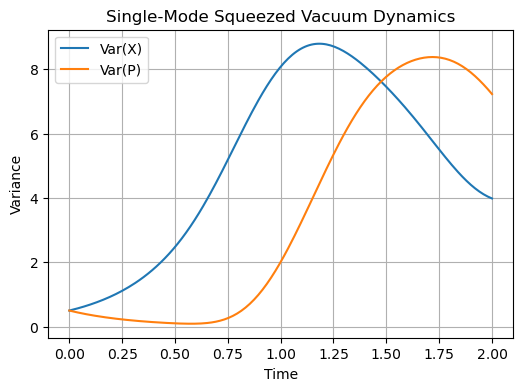

In [9]:
# Plot Single‑Mode Squeezing
plt.figure(figsize=(6,4))
plt.plot(t_list, varX, label='Var(X)')
plt.plot(t_list, varP, label='Var(P)')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Single‑Mode Squeezed Vacuum Dynamics')
plt.legend(); plt.grid(True)
plt.savefig('single_mode_squeezing.png', dpi=300)
plt.show()

In [10]:
# Two‑mode parameters
N = 15
r2 = 0.8
t_list2 = np.linspace(0, 2, 200)
a, b = destroy(N), destroy(N)
H_two = 1j * r2 * (tensor(a.dag(), b.dag()) - tensor(a, b))
psi0_2 = tensor(basis(N,0), basis(N,0))

res2 = sesolve(H_two, psi0_2, t_list2, [])
X1 = (tensor(a, qeye(N)) + tensor(a.dag(), qeye(N)))/np.sqrt(2)
X2 = (tensor(qeye(N), b) + tensor(qeye(N), b.dag()))/np.sqrt(2)
varX1 = [expect(X1**2, st) - expect(X1, st)**2 for st in res2.states]
varX2 = [expect(X2**2, st) - expect(X2, st)**2 for st in res2.states]

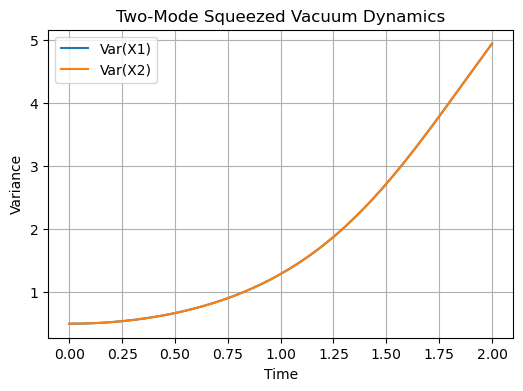

In [11]:
# Plot Two‑Mode Squeezing
plt.figure(figsize=(6,4))
plt.plot(t_list2, varX1, label='Var(X1)')
plt.plot(t_list2, varX2, label='Var(X2)')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Two‑Mode Squeezed Vacuum Dynamics')
plt.legend(); plt.grid(True)
plt.savefig('two_mode_squeezing.png', dpi=300)
plt.show()

In [2]:
##CV Cluster States & Wigner

In [3]:
from qutip import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Parameters
N = 10
r = 1.0
g = 0.05

a1 = destroy(N)
a2 = destroy(N)

# Squeezed vacuum states
S1 = squeeze(N, r)
S2 = squeeze(N, r)

psi1 = S1 * basis(N,0)
psi2 = S2 * basis(N,0)

psi = tensor(psi1, psi2)

# CZ-like gate
X1 = (tensor(a1 + a1.dag(), qeye(N))) / np.sqrt(2)
X2 = (tensor(qeye(N), a2 + a2.dag())) / np.sqrt(2)

U_CZ = (1j * g * X1 * X2).expm()
psi = U_CZ * psi

# Wigner
xvec = np.linspace(-5,5,200)
rho1 = ptrace(psi, 0)
rho2 = ptrace(psi, 1)
W1 = wigner(rho1, xvec, xvec)
W2 = wigner(rho2, xvec, xvec)

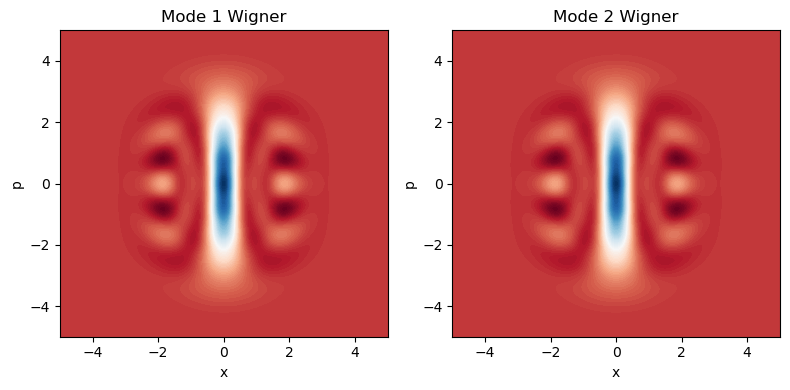

In [5]:
# Plot Wigner Functions
fig, axes = plt.subplots(1,2, figsize=(8,4))
im1 = axes[0].contourf(xvec, xvec, W1, 100, cmap='RdBu')
axes[0].set_title('Mode 1 Wigner')
axes[0].set_xlabel('x'); axes[0].set_ylabel('p')

im2 = axes[1].contourf(xvec, xvec, W2, 100, cmap='RdBu')
axes[1].set_title('Mode 2 Wigner')
axes[1].set_xlabel('x'); axes[1].set_ylabel('p')

plt.tight_layout()
plt.savefig("wigner_cluster_modes.png", dpi=300)
plt.show()